In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [3]:
data = {
'A': np.random.randn(100),
'B': np.random.randn(100),
'C': np.random.randn(100)
}

data['A'][::10] = np.nan 
data['B'][::15] = np.nan 
data['C'][::20] = np.nan 

df = pd.DataFrame(data)

print("Original dataset with missing values and noise:")
print(df.head(31))

Original dataset with missing values and noise:
           A         B         C
0        NaN       NaN       NaN
1   0.198696  1.076954 -0.214905
2  -0.326648  0.830999  0.231425
3   0.332251  0.213429 -0.269575
4  -0.036599 -0.659133 -1.713143
5  -0.244008  0.201276  0.237689
6  -0.650172  0.746022  0.484912
7   0.359512 -0.221308  0.026972
8   0.710762  2.177360  0.845823
9   1.110081  1.040964 -0.996465
10       NaN -1.608511  1.292750
11 -0.294347  0.150150 -0.800992
12 -1.207180 -0.549971 -0.533318
13  0.762091  0.696412 -0.582340
14 -0.700337 -0.282234  0.146154
15 -0.673276       NaN  0.818465
16 -0.306761 -1.087526  1.285697
17 -1.590126  0.413169  1.862505
18  0.906931  0.998201  0.366368
19  0.862342 -0.918664  1.722351
20       NaN  0.851888       NaN
21  0.237698  1.178684 -1.013151
22 -1.089170 -0.637727 -0.689850
23  0.179462  0.076486  1.119470
24  0.283362  1.087904 -0.045233
25  0.250367  2.177348 -0.054468
26  0.245510 -2.329274  0.883875
27 -1.214917 -0.645395  2.14

In [4]:
data = {
'A': np.random.randn(100),
'B': np.random.randn(100),
'C': np.random.randn(100)
}


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       90 non-null     float64
 1   B       93 non-null     float64
 2   C       95 non-null     float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
df_mean_imputed = df.fillna(df.mean())
print("\nDataset after mean imputation:")
print(df_mean_imputed.head(20))

df_median_imputed = df.fillna(df.median())
print("\nDataset after median imputation:")
print(df_median_imputed.head(20))


df_dropped = df.dropna()
print("\nDataset after removing rows with missing values:")
print(df_dropped.head(20))


Dataset after mean imputation:
           A         B         C
0  -0.077810  0.049218  0.197608
1   0.198696  1.076954 -0.214905
2  -0.326648  0.830999  0.231425
3   0.332251  0.213429 -0.269575
4  -0.036599 -0.659133 -1.713143
5  -0.244008  0.201276  0.237689
6  -0.650172  0.746022  0.484912
7   0.359512 -0.221308  0.026972
8   0.710762  2.177360  0.845823
9   1.110081  1.040964 -0.996465
10 -0.077810 -1.608511  1.292750
11 -0.294347  0.150150 -0.800992
12 -1.207180 -0.549971 -0.533318
13  0.762091  0.696412 -0.582340
14 -0.700337 -0.282234  0.146154
15 -0.673276  0.049218  0.818465
16 -0.306761 -1.087526  1.285697
17 -1.590126  0.413169  1.862505
18  0.906931  0.998201  0.366368
19  0.862342 -0.918664  1.722351

Dataset after median imputation:
           A         B         C
0  -0.083543  0.163717  0.222381
1   0.198696  1.076954 -0.214905
2  -0.326648  0.830999  0.231425
3   0.332251  0.213429 -0.269575
4  -0.036599 -0.659133 -1.713143
5  -0.244008  0.201276  0.237689
6  -0.6501

In [7]:
z_scores = np.abs(stats.zscore(df_mean_imputed))

df_no_outliers_zscore = df_mean_imputed[(z_scores < 3).all(axis=1)]

print("\nDataset after removing outliers using Z-score method:")

print(df_no_outliers_zscore.head(20))





Dataset after removing outliers using Z-score method:
           A         B         C
0  -0.077810  0.049218  0.197608
1   0.198696  1.076954 -0.214905
2  -0.326648  0.830999  0.231425
3   0.332251  0.213429 -0.269575
4  -0.036599 -0.659133 -1.713143
5  -0.244008  0.201276  0.237689
6  -0.650172  0.746022  0.484912
7   0.359512 -0.221308  0.026972
8   0.710762  2.177360  0.845823
9   1.110081  1.040964 -0.996465
10 -0.077810 -1.608511  1.292750
11 -0.294347  0.150150 -0.800992
12 -1.207180 -0.549971 -0.533318
13  0.762091  0.696412 -0.582340
14 -0.700337 -0.282234  0.146154
15 -0.673276  0.049218  0.818465
16 -0.306761 -1.087526  1.285697
17 -1.590126  0.413169  1.862505
18  0.906931  0.998201  0.366368
19  0.862342 -0.918664  1.722351


In [8]:
Q1 = df_mean_imputed.quantile(0.25)

Q3 = df_mean_imputed.quantile(0.75)

IQR = Q3 - Q1

df_no_outliers_iqr = df_mean_imputed[~((df_mean_imputed < (Q1 - 1.5 * IQR)) 
                        | (df_mean_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataset after removing outliers using IQR method:")

print(df_no_outliers_iqr.head(20))


Dataset after removing outliers using IQR method:
           A         B         C
0  -0.077810  0.049218  0.197608
1   0.198696  1.076954 -0.214905
2  -0.326648  0.830999  0.231425
3   0.332251  0.213429 -0.269575
4  -0.036599 -0.659133 -1.713143
5  -0.244008  0.201276  0.237689
6  -0.650172  0.746022  0.484912
7   0.359512 -0.221308  0.026972
8   0.710762  2.177360  0.845823
9   1.110081  1.040964 -0.996465
10 -0.077810 -1.608511  1.292750
11 -0.294347  0.150150 -0.800992
12 -1.207180 -0.549971 -0.533318
13  0.762091  0.696412 -0.582340
14 -0.700337 -0.282234  0.146154
15 -0.673276  0.049218  0.818465
16 -0.306761 -1.087526  1.285697
17 -1.590126  0.413169  1.862505
18  0.906931  0.998201  0.366368
19  0.862342 -0.918664  1.722351


In [9]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})




In [10]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [11]:
df[~(df['A'] == 2)]

,A,B
0,1,4
2,3,6


In [12]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [ ]:



df = sns.load_dataset('titanic')



print("First few rows of the Titanic dataset:")
print(df.head())

First few rows of the Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [14]:
print("\nBasic statistics of the Titanic dataset:")
print(df.describe(include='all'))


Basic statistics of the Titanic dataset:


          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

<Figure size 1400x600 with 0 Axes>

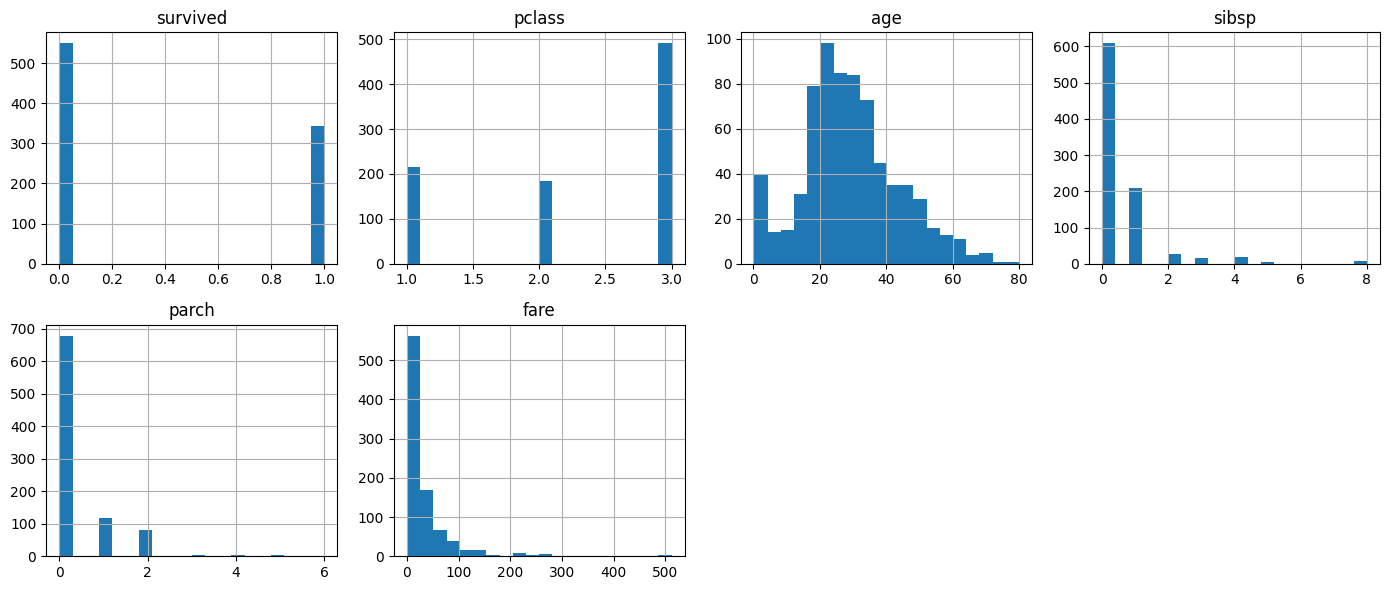

In [27]:
plt.figure(figsize=(14, 6))
df.hist(bins=20, figsize=(14, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

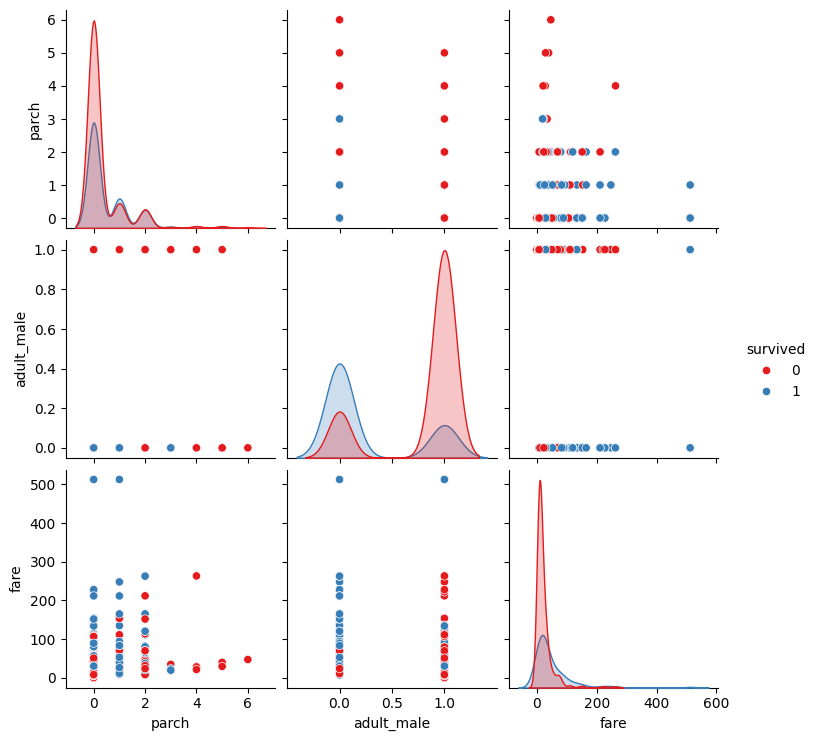

In [16]:
sns.pairplot(df[[ 'parch', 'adult_male', 'survived','fare']], hue='survived', palette='Set1')
plt.show()

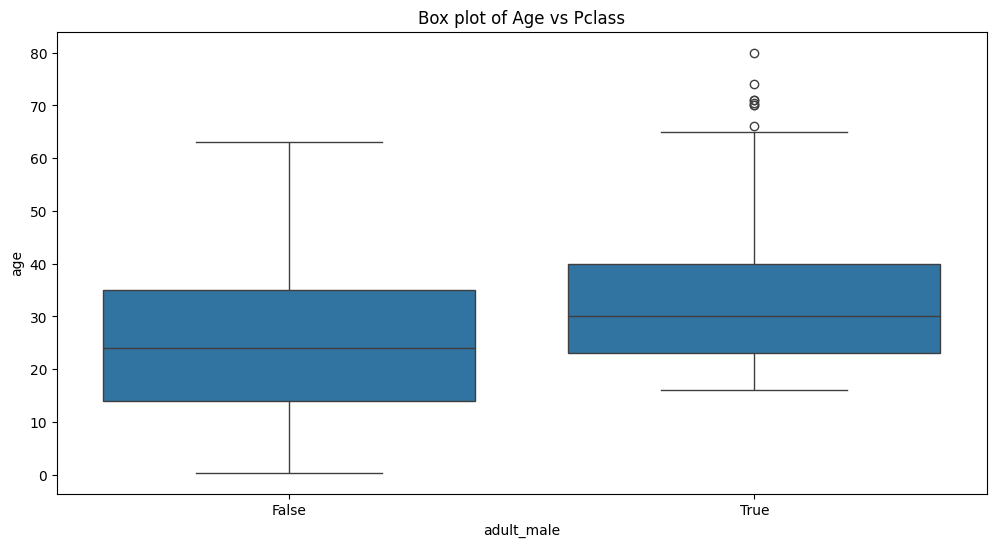

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='adult_male', y='age', data=df)
plt.title('Box plot of Age vs Pclass')
plt.show()

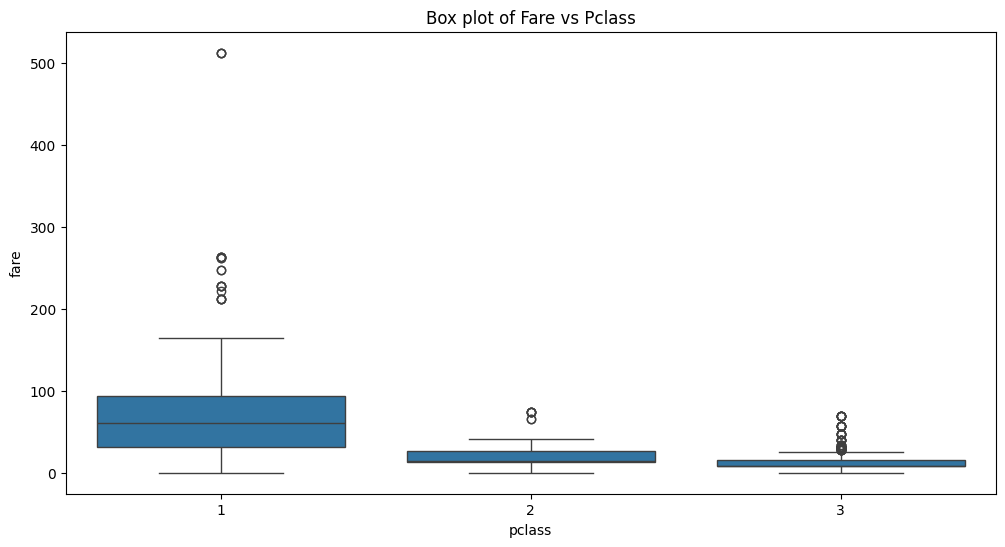

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Box plot of Fare vs Pclass')
plt.show()

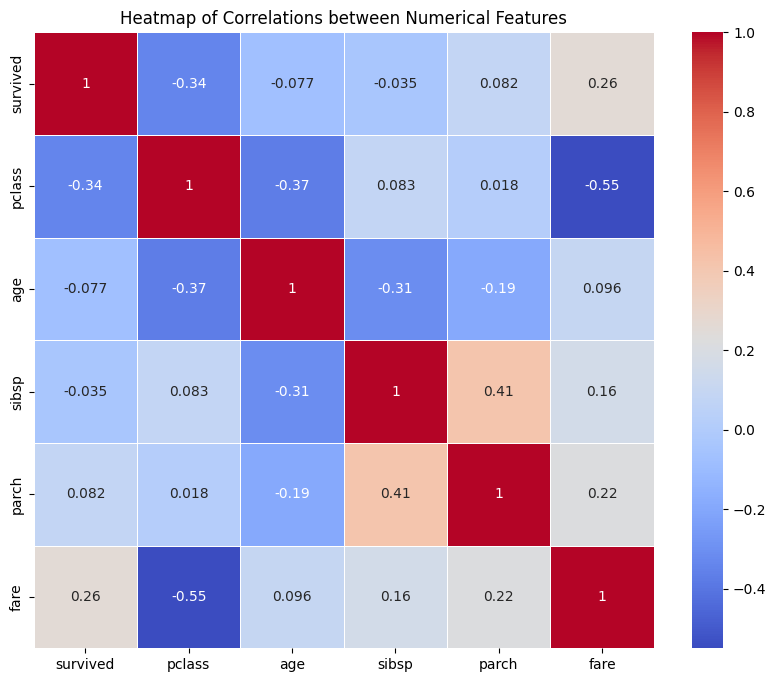

In [26]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations between Numerical Features')
plt.show()


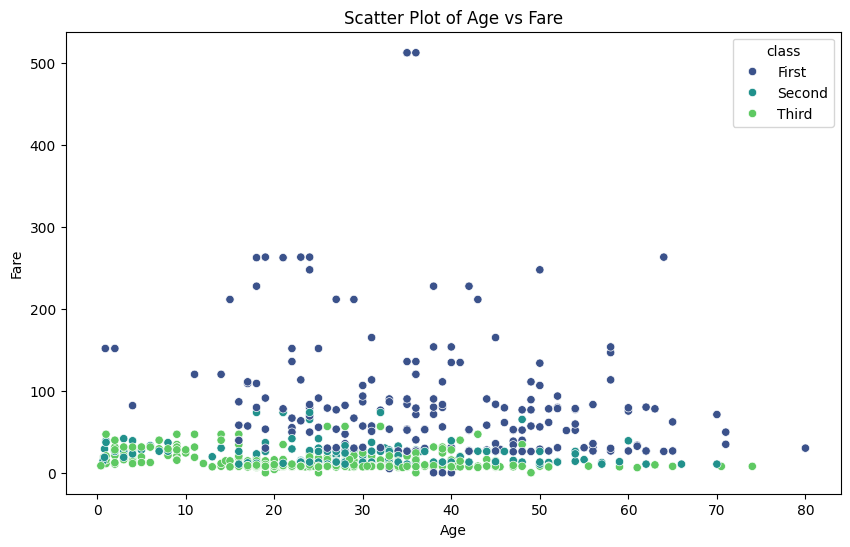

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='class', palette='viridis')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()